# Business Statement

**The aim of this project is to build algorithms to predict selling price of cars.**

**In this we use various regression techniques to predict the selling prices of cars and compare the results**

# Loading Packages

In [43]:
library(tidyverse)
library(stringr)
library(purrr)
library(Amelia)
library(GGally)
library(caret)
library(relaimpo)
library(randomForest)
library(gbm)
library(broom)

In [4]:
car <- read.csv('../input/vehicle-dataset-from-cardekho/Car details v3.csv')

head(car)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
1,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5
2,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5
3,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5
4,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5
5,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5
6,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5


**name** - Name of the cars

**year** - Year of the car when it was bought

**selling_price** - Price at which the car is being sold

**km_driven** - Number of Kilometers the car is driven

**fuel** - Fuel type of car (petrol / diesel / CNG / LPG / electric)

**seller_type** - Tells if a Seller is Individual or a Dealer

**transmission** - Gear transmission of the car (Automatic/Manual)

**Owner** - Number of previous owners of the car.

In [5]:
#extracting only the car brand name from car name column and visualizing the results

car$name <- word(car$name,1)

# EDA

In [ ]:
#Plotting car name to check the distribution

ggplot(data = car, aes(x=name, fill = name)) +
  geom_bar() + labs(x='Car Brand') + labs(title = "Bar Graph of Car Brand") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)

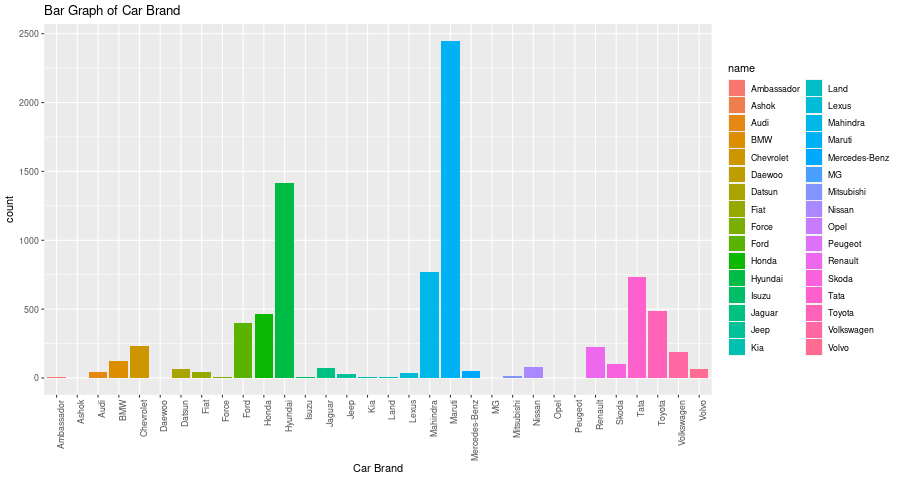

Converting the car brand names into Ordinal Encoder for easier manipulations

# Cleaning the Data

In [6]:
car$name <- str_replace(car$name, 'Maruti', '0')
car$name <- str_replace(car$name, 'Skoda', '1')
car$name <- str_replace(car$name, 'Honda', '2')
car$name <- str_replace(car$name, 'Hyundai', '3')
car$name <- str_replace(car$name, 'Toyota', '4')
car$name <- str_replace(car$name, 'Ford', '5')
car$name <- str_replace(car$name, 'Renault', '6')
car$name <- str_replace(car$name, 'Mahindra', '7')
car$name <- str_replace(car$name, 'Tata', '8')
car$name <- str_replace(car$name, 'Chevrolet', '9')
car$name <- str_replace(car$name, 'Fiat', '10')
car$name <- str_replace(car$name, 'Datsun', '11')
car$name <- str_replace(car$name, 'Jeep', '12')
car$name <- str_replace(car$name, 'Mercedes-Benz', '13')
car$name <- str_replace(car$name, 'Mitsubishi', '14')
car$name <- str_replace(car$name, 'Audi', '15')
car$name <- str_replace(car$name, 'Volkswagen', '16')
car$name <- str_replace(car$name, 'BMW', '17')
car$name <- str_replace(car$name, 'Nissan', '18')
car$name <- str_replace(car$name, 'Lexus', '19')
car$name <- str_replace(car$name, 'Jaguar', '20')
car$name <- str_replace(car$name, 'Land', '21')
car$name <- str_replace(car$name, 'MG', '22')
car$name <- str_replace(car$name, 'Volvo', '23')
car$name <- str_replace(car$name, 'Daewoo', '24')
car$name <- str_replace(car$name, 'Kia', '25')
car$name <- str_replace(car$name, 'Force', '26')
car$name <- str_replace(car$name, 'Ambassador', '27')
car$name <- str_replace(car$name, 'Ashok', '28')
car$name <- str_replace(car$name, 'Isuzu', '29')
car$name <- str_replace(car$name, 'Opel', '30')
car$name <- str_replace(car$name, 'Peugeot', '31')

#Converting car name from categorical to numerical value

car$name <- as.numeric(car$name)
table(car$name)


   0    1    2    3    4    5    6    7    8    9   10   11   12   13   14   15 
2448  105  467 1415  488  397  228  772  734  230   47   65   31   54   14   40 
  16   17   18   19   20   21   22   23   24   25   26   27   28   29   30   31 
 186  120   81   34   71    6    3   67    3    4    6    4    1    5    1    1 

**Highest numbers of cars fall into Maruti brand followed by Hyundai, Mahindra and Tata brands**

In [7]:
car <- subset (car, select = -torque)

In [9]:
#Removing unit from mileage, converting it to numeric value and replacing the missing values
car$mileage <- str_replace(car$mileage, 'kmpl', '')
car$mileage <- str_replace(car$mileage, 'km/kg', '')
car$mileage <- as.numeric(car$mileage)
car$mileage[is.na(car$mileage)]<-mean(car$mileage,na.rm=TRUE)

In [10]:
#Removing unit from engine, converting it to numeric value and replacing the missing values

car$engine <- str_replace(car$engine, 'CC', '')
car$engine <- as.numeric(car$engine)
car$engine[is.na(car$engine)]<-mean(car$engine,na.rm=TRUE)

In [11]:
#Removing unit from max_power, converting it to numeric value and replacing the missing values
car$max_power <- str_replace(car$max_power, 'bhp', '')
car$max_power <- as.numeric(car$max_power)
car$max_power[is.na(car$max_power)]<-mean(car$max_power,na.rm=TRUE)

In [12]:
#Converting seats to numeric value and replacing the missing values
car$seats <- as.numeric(car$seats)
car$seats[is.na(car$seats)]<-median(car$seats,na.rm=TRUE)

In [13]:
car$mileage[car$mileage == ""] <- NA
car$engine[car$engine == ""] <- NA
car$max_power[car$max_power == ""] <- NA

In [14]:
# Checking for missing values
sapply(car, function(x) sum(is.na(x)))

name          year selling_price     km_driven          fuel 
            0             0             0             0             0 
  seller_type  transmission         owner       mileage        engine 
            0             0             0             0             0 
    max_power         seats 
            0             0

In [ ]:
#Missing values map 

missmap(car, legend = TRUE, col = c("yellow", "dodgerblue"))

**We ensure that there are no missing values in the columns**

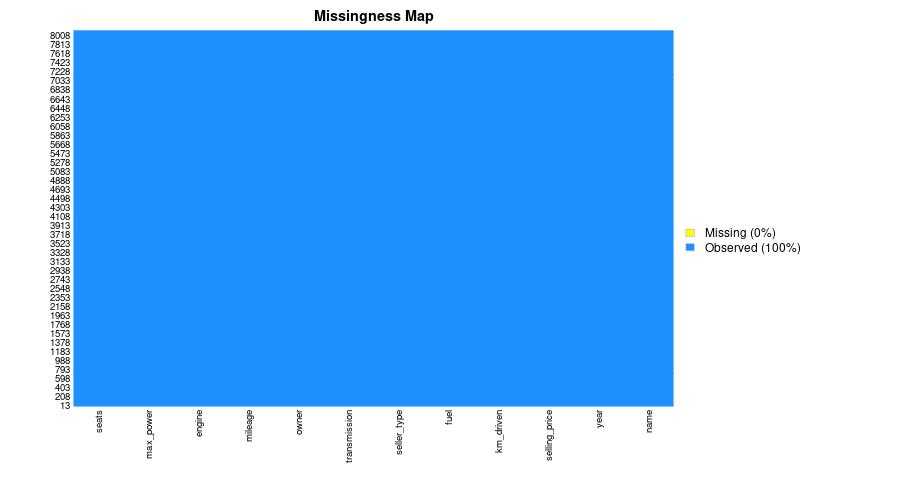

In [ ]:
# Bar graph of Fuel
ggplot(data = car, aes(x=reorder(fuel, fuel, function(x)-length(x)), fill = fuel)) +
  geom_bar() + labs(x='Fuel') + labs(title = "Bar Graph of Fuel") 

**Diesel and Petrol have the highest ownership for the fuel types**

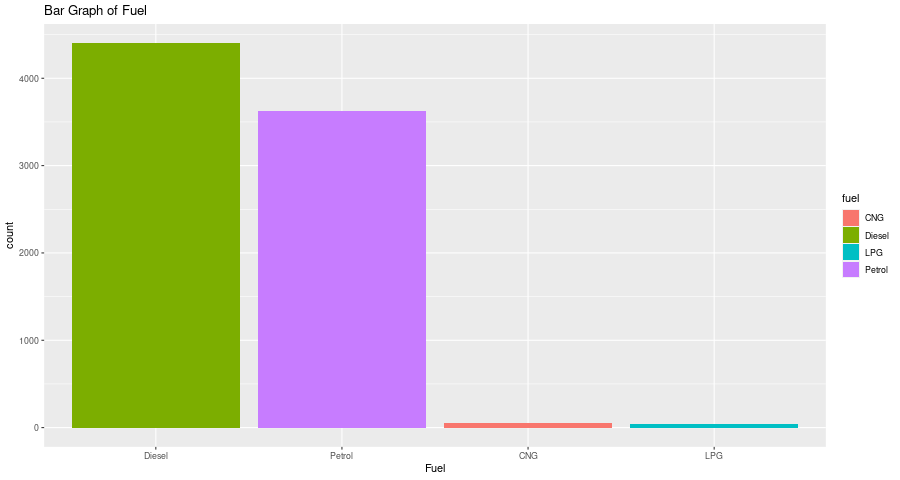

**Most of the cars fall into Diesel category followed by Petrol. Very few cars fall into CNG and LPG category.**

In [ ]:
# Bar graph of Owner
ggplot(data = car, aes(x=reorder(owner, owner, function(x)-length(x)), fill = owner)) +
  geom_bar() + labs(x='Owner') + labs(title = "Bar Graph of Owner") + 
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

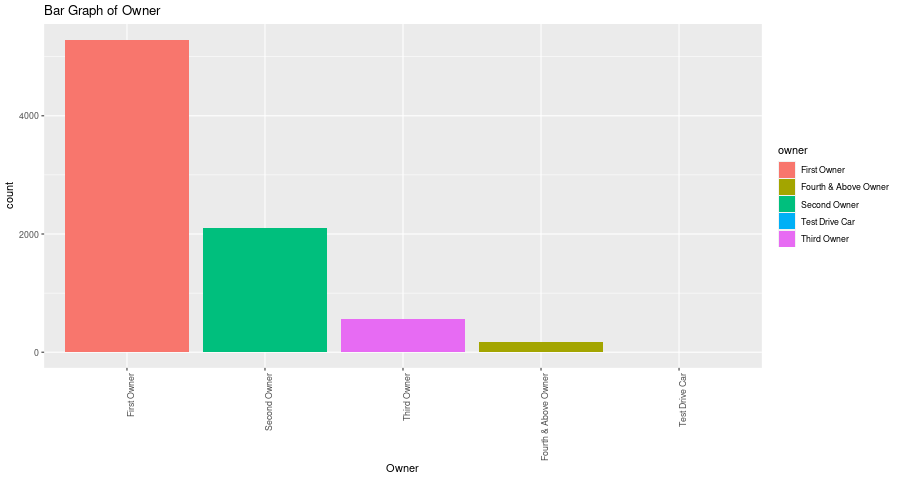

**Most of the cars are owned by first owners.**

In [ ]:
# Bar graph of seats
ggplot(data = car, aes(x=reorder(seats, seats, function(x)-length(x)), fill = seats)) +
  geom_bar() + labs(x='Seats') + labs(title = "Bar Graph of Seats") +theme(axis.text.x = element_text(angle = 90, hjust = 1))

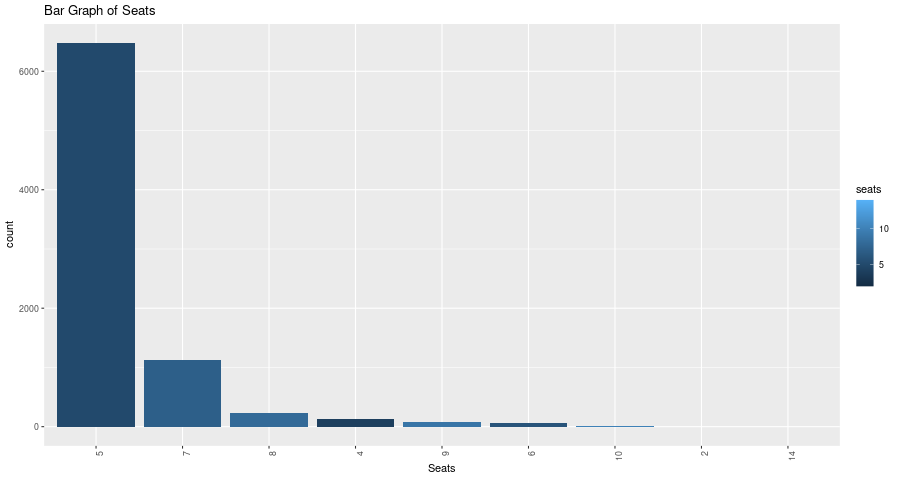

**Majority of the seats in the cars are 5 seaters. So compact cars are the most dominant one in the car market.**

In [16]:
#Converting transmission column into binary 0 if Manual and 1 if Automatic
car$transmission <- str_replace(car$transmission, 'Manual', "0")
car$transmission <- str_replace(car$transmission, 'Automatic', "1")
car$transmission <- as.numeric(car$transmission)
table(car$transmission)



   0    1 
7078 1050 

In [17]:
#Converting owner into Ordinal Encoder
car$owner <- str_replace(car$owner, 'First Owner', "0")
car$owner <- str_replace(car$owner, 'Second Owner', "1")
car$owner <- str_replace(car$owner, 'Third Owner', "2")
car$owner <- str_replace(car$owner, 'Fourth & Above Owner', "3")
car$owner <- str_replace(car$owner, 'Test Drive Car', "4")
car$owner <- as.numeric(car$owner)
table(car$owner)


   0    1    2    3    4 
5289 2105  555  174    5 

In [18]:
#Converting seller_type into Ordinal Encoder
car$seller_type <- str_replace(car$seller_type, "Trustmark Dealer", "0")
car$seller_type <- str_replace(car$seller_type, "Dealer", "1")
car$seller_type <- str_replace(car$seller_type, "Individual", "2")
car$seller_type <- as.numeric(car$seller_type)
table(car$seller_type)


   0    1    2 
 236 1126 6766 

In [19]:
#Converting fuel into Ordinal Encoder
car$fuel <- str_replace(car$fuel, 'Diesel', "0")
car$fuel <- str_replace(car$fuel, 'Petrol', "1")
car$fuel <- str_replace(car$fuel, 'CNG', "2")
car$fuel <- str_replace(car$fuel, 'LPG', "3")
car$fuel <- as.numeric(car$fuel)
table(car$fuel)


   0    1    2    3 
4402 3631   57   38 

In [ ]:
#Histogram of Selling Price
ggplot(car, aes(x=selling_price)) + 
  geom_histogram(aes(y=..density..), colour="black", fill="white")+
  geom_density(alpha=.2, fill="blue")+
  labs(x='Selling Price ') + labs(title = "Histogram Graph of Selling Price") +
  scale_x_continuous(trans='log10')

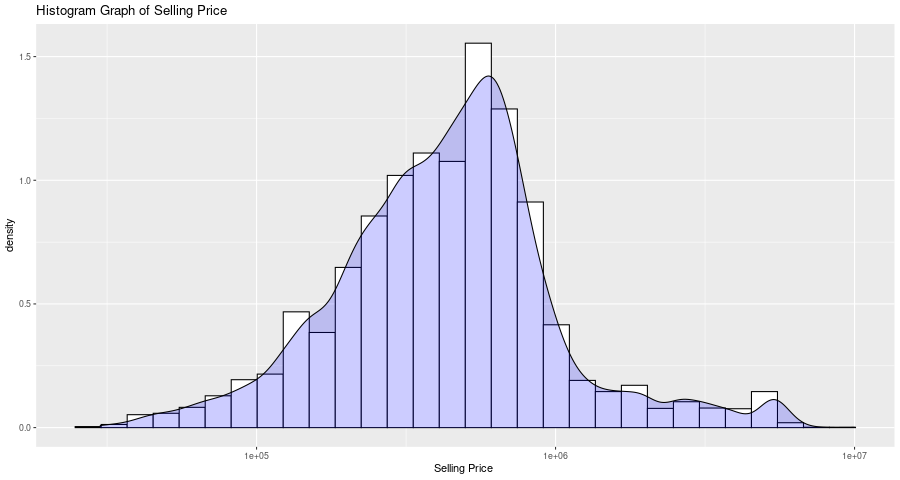

In [ ]:
#Histogram of Km Driven
ggplot(car, aes(x=km_driven)) + 
  geom_histogram(color="black", fill="blue", bins = 200)+
  labs(x='Km Driven ') + labs(title = "Histogram Graph of Km Driven") +
  scale_x_continuous(trans='log10')

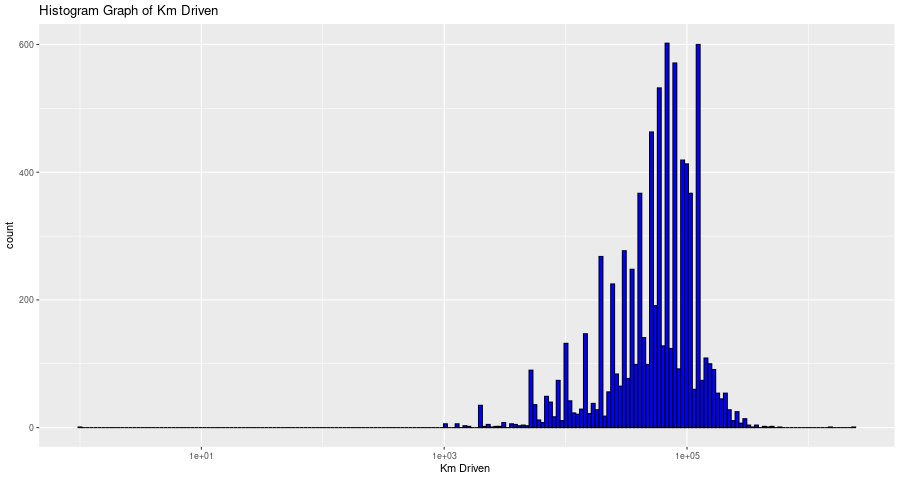

In [ ]:
library(corrplot)
corrplot(cor(car), type="full", 
         method ="color", title = "Correlation Plot", 
         mar=c(0,0,1,0), tl.cex= 0.8, outline= T, tl.col="indianred4")

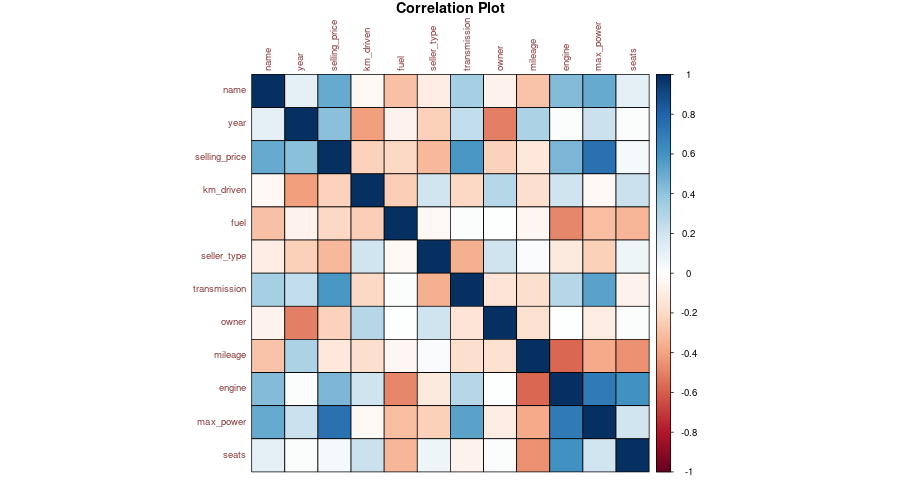

In [ ]:
ggcorr(car, label = T)

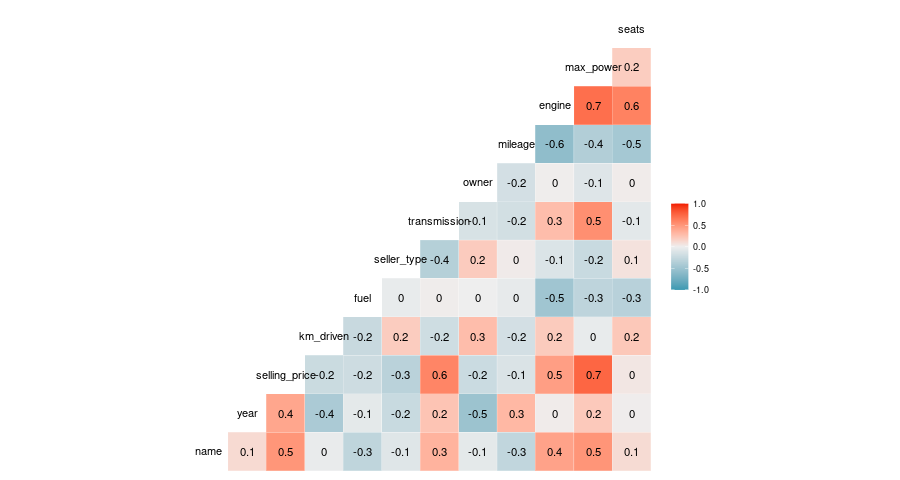

In [ ]:
round(cor(car),2)

**We can see that selling price is highly correlated to max_power then transmission and name.**

# Building a model

**Below we will partition the data set into Train and Test set and we will train different ML algorithms to Training sets and apply to the testing set.**

In [21]:
set.seed(5)
trainIndex <- createDataPartition(car$selling_price, p = .7,
                                  list = FALSE,
                                  times = 1)
Train <- car[ trainIndex,]
Test <- car[-trainIndex,]

# Linear Regression

In [22]:
m1_lr <- lm(selling_price ~ ., data = Train)
summary(m1_lr)


Call:
lm(formula = selling_price ~ ., data = Train)

Residuals:
     Min       1Q   Median       3Q      Max 
-2464480  -211652    -5224   167360  3952046 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -5.854e+07  4.256e+06 -13.753  < 2e-16 ***
name          2.444e+04  1.426e+03  17.134  < 2e-16 ***
year          2.862e+04  2.127e+03  13.455  < 2e-16 ***
km_driven    -1.585e+00  1.608e-01  -9.855  < 2e-16 ***
fuel          1.777e+04  1.532e+04   1.160 0.246009    
seller_type  -9.833e+04  1.407e+04  -6.990 3.07e-12 ***
transmission  4.348e+05  2.307e+04  18.844  < 2e-16 ***
owner        -3.004e+03  9.705e+03  -0.310 0.756893    
mileage       2.360e+04  2.422e+03   9.744  < 2e-16 ***
engine        9.283e+01  2.682e+01   3.461 0.000542 ***
max_power     1.243e+04  3.001e+02  41.427  < 2e-16 ***
seats        -1.293e+04  9.401e+03  -1.376 0.169011    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 449100 

**Based on the p-value above we can see that features such as fuel, owner,seats are not statistically significant so we can potentiall remove them to improve the accuracy of the model**

In [23]:
# calculate relative importance
relImportance <- calc.relimp(m1_lr, type = "lmg", rela = F)  

# Sort
cat('Relative Importances: \n')
importance_lr <- as.data.frame(sort(round(relImportance$lmg, 3), decreasing=TRUE))

importance_lr



Relative Importances: 


,"sort(round(relImportance$lmg, 3), decreasing = TRUE)"
,<dbl>
max_power,0.256
transmission,0.120
name,0.081
engine,0.075
year,0.062
km_driven,0.030
seller_type,0.027
fuel,0.013
mileage,0.013


In [24]:
lr <- lm(selling_price ~ name+year+km_driven+seller_type+mileage+transmission+max_power, data = Train)
summary(lr)


Call:
lm(formula = selling_price ~ name + year + km_driven + seller_type + 
    mileage + transmission + max_power, data = Train)

Residuals:
     Min       1Q   Median       3Q      Max 
-2439581  -212038    -5929   162978  3916432 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -5.961e+07  3.768e+06 -15.818  < 2e-16 ***
name          2.471e+04  1.374e+03  17.981  < 2e-16 ***
year          2.919e+04  1.877e+03  15.550  < 2e-16 ***
km_driven    -1.496e+00  1.471e-01 -10.163  < 2e-16 ***
seller_type  -1.031e+05  1.393e+04  -7.402 1.54e-13 ***
mileage       2.033e+04  1.816e+03  11.192  < 2e-16 ***
transmission  4.344e+05  2.259e+04  19.228  < 2e-16 ***
max_power     1.303e+04  2.356e+02  55.287  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 449500 on 5683 degrees of freedom
Multiple R-squared:  0.6954,	Adjusted R-squared:  0.695 
F-statistic:  1853 on 7 and 5683 DF,  p-value: < 2.2e-16


In [ ]:
plot(lr)

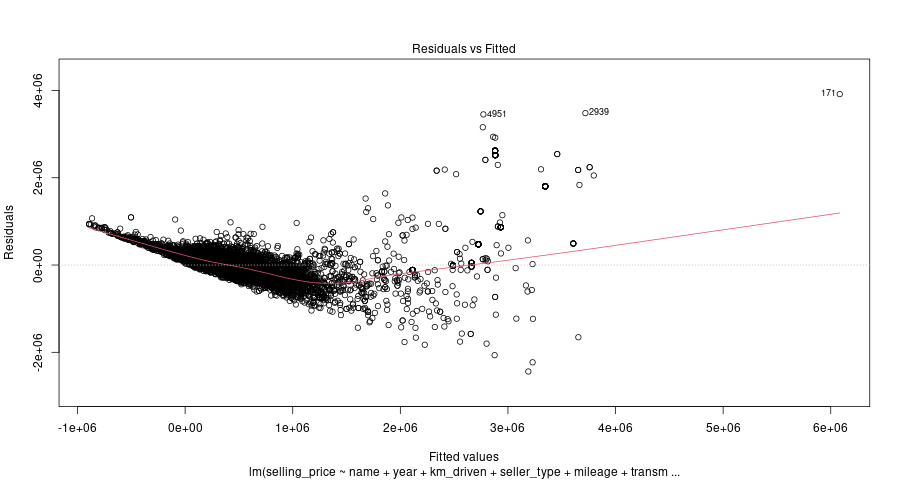

**Based on the Q-Q plot below we can see the distribution is normal**

**Kurtosis (a measure of “Tailedness”) of the distribution can be known by simply looking at its Q-Q plot. The distribution with a fat tail will have both the ends of the Q-Q plot to deviate from the straight line and its center follows a straight line, whereas a thin-tailed distribution will form a Q-Q plot with a very less or negligible deviation at the ends thus making it a perfect fit for the Normal Distribution.**

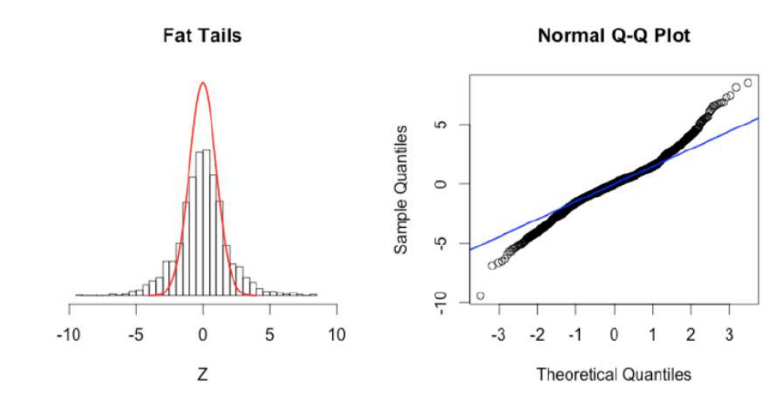

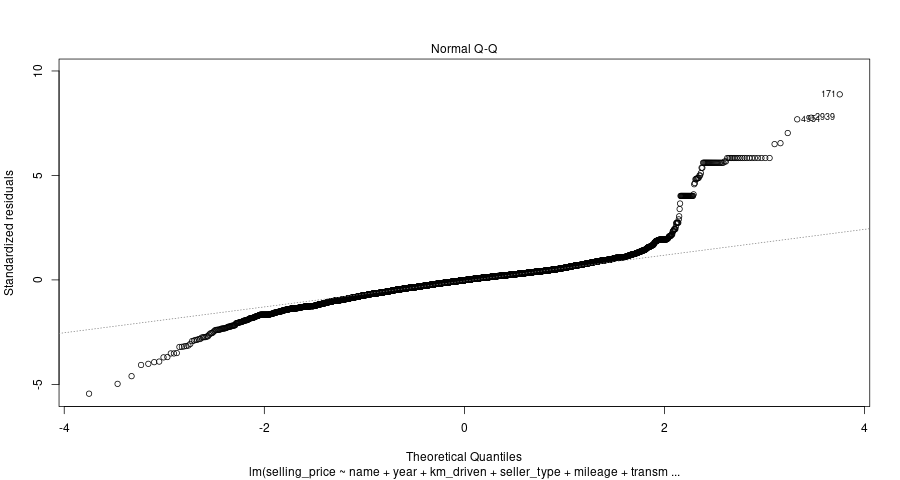

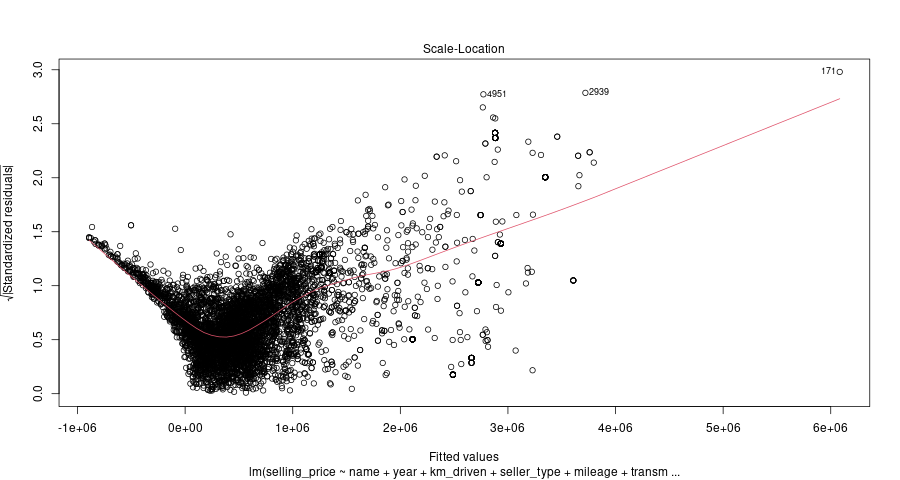

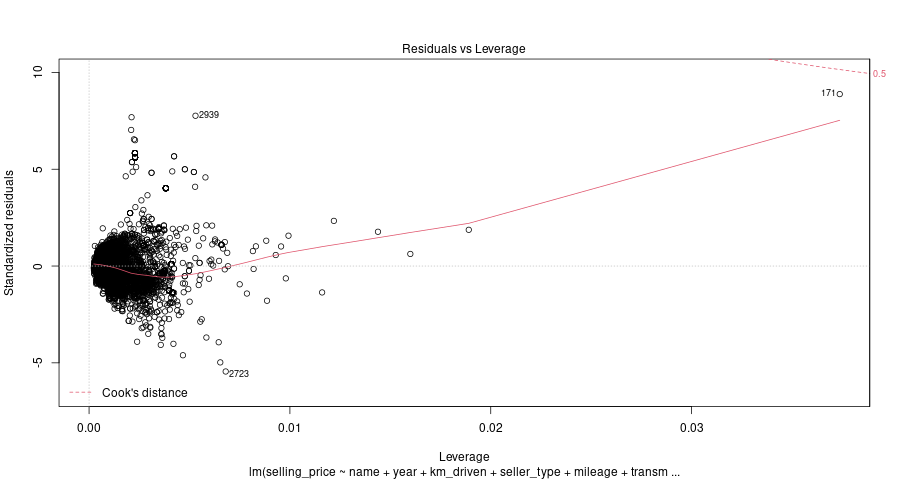

In [36]:
pred_lr <- predict(lr, newdata = Test)
error_lr <- Test$selling_price - pred_lr
RMSE_lr <- round(sqrt(mean(error_lr^2)),2)
RMSE_lr

[1] 457916.9

In [ ]:
plot(Test$selling_price,pred_lr, main="Scatterplot", col = c("red","blue"), xlab = "Actual Selling Price", ylab = "Predicted Selling Price")

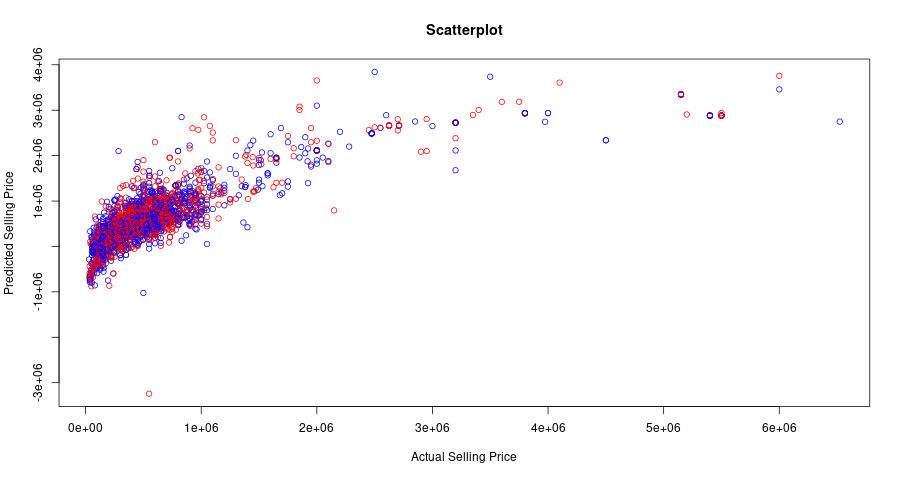

# Random Forest

In [27]:
m2_rf <- randomForest(selling_price~.,data = Train)

m2_rf


Call:
 randomForest(formula = selling_price ~ ., data = Train) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 3

          Mean of squared residuals: 25734079027
                    % Var explained: 96.11

In [ ]:
plot(m2_rf)

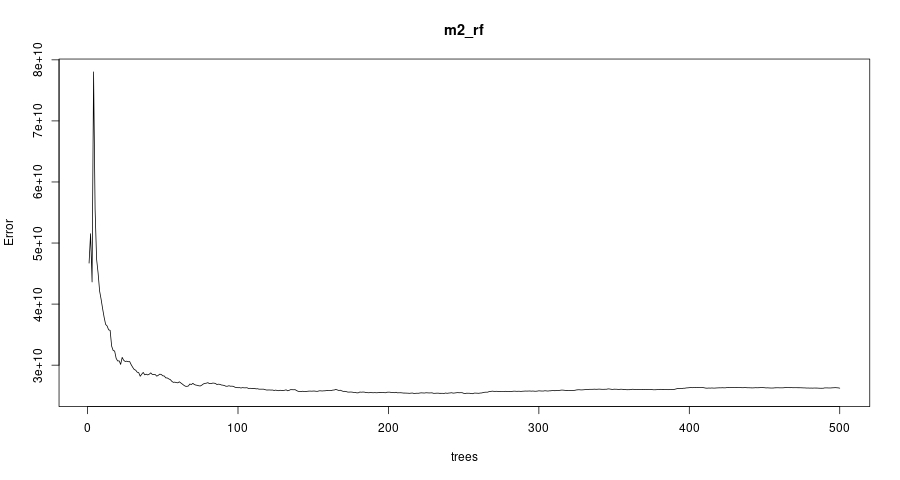

**We can calculate the variable importance of the features using the following**

In [ ]:
varImpPlot(m2_rf, main ='Feature Importance')

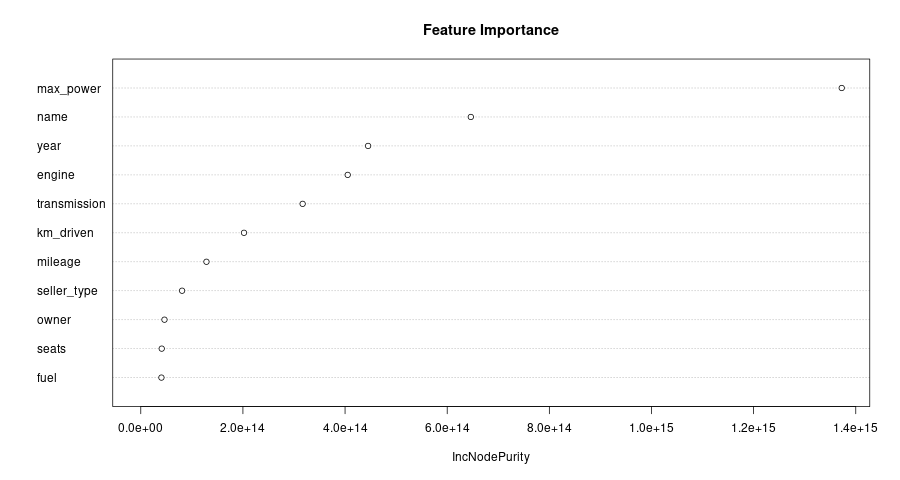

In [28]:
pred_rf <- predict(m2_rf, Test)
error_rf <- Test$selling_price - pred_rf
RMSE_rf <- round(sqrt(mean(error_rf^2)),2)


In [ ]:
plot(Test$selling_price,pred_rf, main="Scatterplot", col = c("red","blue"), xlab = "Actual Selling Price", ylab = "Predicted Selling Price")

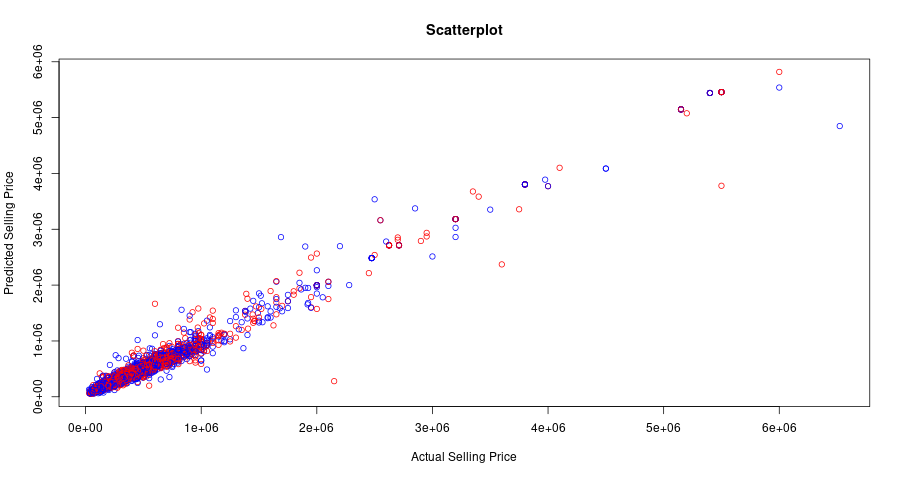

# Elastic Regression

**It is combination of Lasso(L1) and Ridge Regression(L2)**

In [29]:
train_cont <- trainControl(method = "repeatedcv",
                              number = 10,
                              repeats = 5,
                              search = "random",
                              verboseIter = TRUE)

In [44]:
elastic_reg <- train(selling_price ~.,
                           data = Train,
                           method = "glmnet",
                           preProcess = c("center", "scale"),
                           tuneLength = 10,
                           trControl = train_cont)

+ Fold01.Rep1: alpha=0.86938, lambda=0.6678174 
- Fold01.Rep1: alpha=0.86938, lambda=0.6678174 
+ Fold01.Rep1: alpha=0.02045, lambda=0.0482704 
- Fold01.Rep1: alpha=0.02045, lambda=0.0482704 
+ Fold01.Rep1: alpha=0.27128, lambda=0.2259951 
- Fold01.Rep1: alpha=0.27128, lambda=0.2259951 
+ Fold01.Rep1: alpha=0.18694, lambda=0.0143956 
- Fold01.Rep1: alpha=0.18694, lambda=0.0143956 
+ Fold01.Rep1: alpha=0.24774, lambda=3.2616259 
- Fold01.Rep1: alpha=0.24774, lambda=3.2616259 
+ Fold01.Rep1: alpha=0.65187, lambda=0.1235536 
- Fold01.Rep1: alpha=0.65187, lambda=0.1235536 
+ Fold01.Rep1: alpha=0.35682, lambda=0.0009821 
- Fold01.Rep1: alpha=0.35682, lambda=0.0009821 
+ Fold01.Rep1: alpha=0.80846, lambda=0.2021421 
- Fold01.Rep1: alpha=0.80846, lambda=0.2021421 
+ Fold01.Rep1: alpha=0.74296, lambda=0.0035101 
- Fold01.Rep1: alpha=0.74296, lambda=0.0035101 
+ Fold01.Rep1: alpha=0.78612, lambda=0.0075827 
- Fold01.Rep1: alpha=0.78612, lambda=0.0075827 
+ Fold02.Rep1: alpha=0.86938, lambda=0.6

ERROR: Error: No tidy method for objects of class train


In [31]:
pred_er <- predict(elastic_reg, Test)
error_er <- Test$selling_price - pred_er
RMSE_er <- sqrt(mean(error_er^2))
RMSE_er <- round(RMSE_er,2)

# Gradient Boosting

In [32]:
set.seed(123)

m3_gbm <- gbm(
  formula = selling_price ~ .,
  distribution = "gaussian",
  data = Train,
  n.trees = 6000,
  interaction.depth = 3,
  shrinkage = 0.1,
  cv.folds = 5,
  n.cores = NULL, # will use all cores by default
  verbose = FALSE
)  

m3_gbm

gbm(formula = selling_price ~ ., distribution = "gaussian", data = Train, 
    n.trees = 6000, interaction.depth = 3, shrinkage = 0.1, cv.folds = 5, 
    verbose = FALSE, n.cores = NULL)
A gradient boosted model with gaussian loss function.
6000 iterations were performed.
The best cross-validation iteration was 2983.
There were 11 predictors of which 11 had non-zero influence.

**Loss Function**

In [ ]:
gbm.perf(m3_gbm, method = "cv")

** [1] 2983**

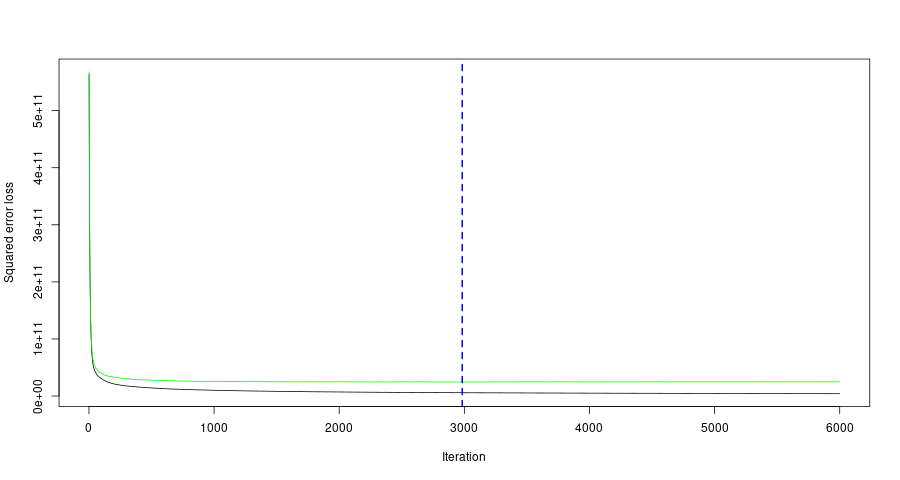

,var,rel.inf
,<chr>,<dbl>
max_power,max_power,68.4760718
year,year,15.6969182
km_driven,km_driven,5.2454442
name,name,3.2424510
engine,engine,3.1259345
mileage,mileage,2.3627410
transmission,transmission,0.6252901
fuel,fuel,0.4399373
seller_type,seller_type,0.4286109


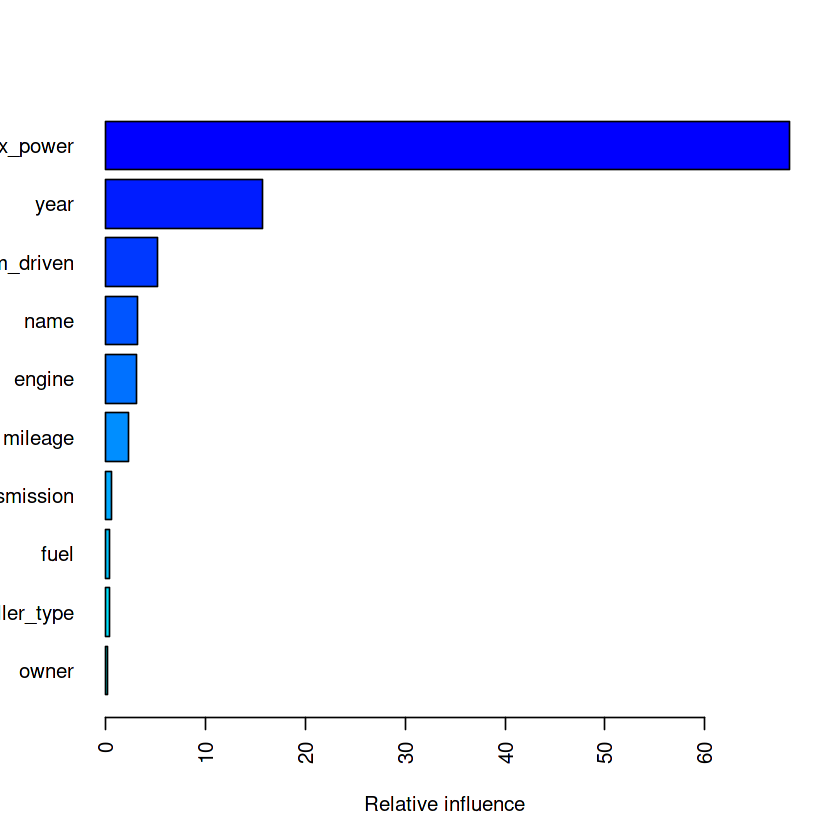

In [33]:
summary(
  m3_gbm, 
  cBars = 10,
  method = relative.influence, las = 2
)

In [34]:
pred_gbm <- predict(m3_gbm, Test)
## Using 2983 trees...
error_gbm <- Test$selling_price - pred_gbm
RMSE_gbm <- round(sqrt(mean(error_gbm^2)),2)


Using 2983 trees...




In [ ]:
plot(Test$selling_price,pred_gbm, main="Scatterplot", col = c("red","blue"), xlab = "Actual Selling Price", ylab = "Predicted Selling Price")

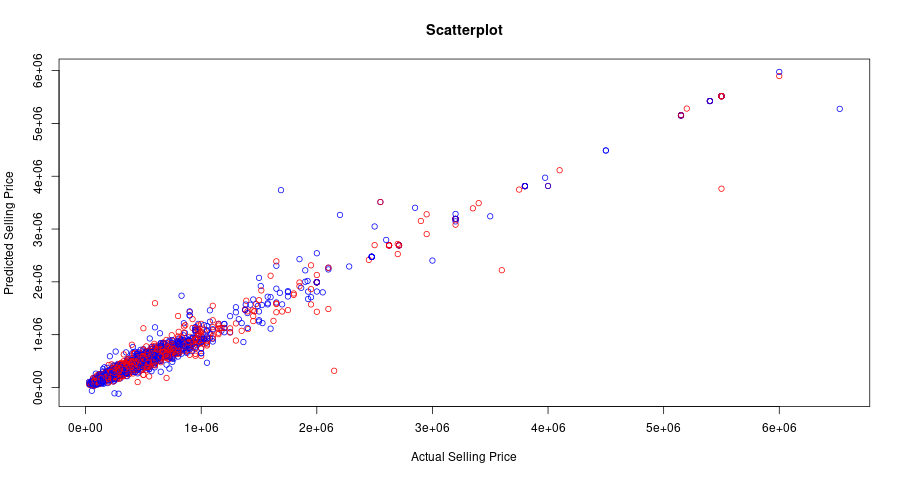

In [42]:
Model <- c('Linear Regression','Random Forest','Elastic Net','Gradient Boosting')

RMSE <- c(RMSE_lr,RMSE_rf,RMSE_er,RMSE_gbm)

res <- data.frame(Model,RMSE)

res %>% arrange(RMSE,descending =TRUE)


Model,RMSE
<chr>,<dbl>
Random Forest,127777.3
Gradient Boosting,135282.4
Linear Regression,457916.9
Elastic Net,458603.4


**Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors).**

**Residuals are a measure of how far from the regression line data points are;**

**RMSE is a measure of how spread out these residuals are.**

**In other words, it tells you how concentrated the data is around the line of best fit.**

**Random Forest explains 96% of the variation and has the lowest RMSE.**

**Variables that are useful to describe the variance are max_power, name, engine and year.**

**In the random forest model we used 500 number of trees and number of variables tried at each split as 3.**

**We can further tune the model to get better RMSE.**